In [77]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
path_test = '/Users/eaxes/DA Projects/CMC/data/collected_data/coins_date_and_values'

In [79]:
def get_listing_sell_price(hours, path_to_values, coingecko_id):
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')
    df_values = pd.read_csv(path_to_values, index_col = 0, \
                           parse_dates=['date'], \
                           date_parser=dateparse)
    df_values_for_coin = df_values.query('coingecko_numerical_id == @coingecko_id')
    border_date = df_values_for_coin.date.min() + datetime.timedelta(hours=12)
    df_border_values = df_values_for_coin.query("date < @border_date")
    return df_border_values.value.median()
    

In [81]:
get_listing_sell_price(12, path_test, 24453)

0.035165478331236705

In [33]:
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')
df_values = pd.read_csv('/Users/eaxes/DA Projects/CMC/data/collected_data/coins_date_and_values', \
                        index_col = 0, \
                        parse_dates=['date'], \
                        date_parser=dateparse)
df_values.dtypes

coingecko_numerical_id             int64
date                      datetime64[ns]
value                            float64
dtype: object

In [34]:
id = 24453
df_values_for_coin = df_values.query('coingecko_numerical_id == @id')
df_values_for_coin

,coingecko_numerical_id,date,value
0,24453,2022-04-05 13:04:00,0.033954
1,24453,2022-04-05 14:03:00,0.037211
2,24453,2022-04-05 15:04:00,0.034519
3,24453,2022-04-05 16:02:00,0.038607
4,24453,2022-04-05 17:02:00,0.036294
...,...,...,...
1431,24453,2022-06-04 08:12:00,0.002441
1432,24453,2022-06-04 09:16:00,0.002422
1433,24453,2022-06-04 10:13:00,0.002417
1434,24453,2022-06-04 11:12:00,0.002483


In [60]:
border_date = df_values_for_coin.date.min() + datetime.timedelta(hours=12)


In [61]:
df_border_values = df_values_for_coin.query("date < @border_date")
df_border_values.head()

,coingecko_numerical_id,date,value
0,24453,2022-04-05 13:04:00,0.033954
1,24453,2022-04-05 14:03:00,0.037211
2,24453,2022-04-05 15:04:00,0.034519
3,24453,2022-04-05 16:02:00,0.038607
4,24453,2022-04-05 17:02:00,0.036294


<AxesSubplot:xlabel='date', ylabel='value'>

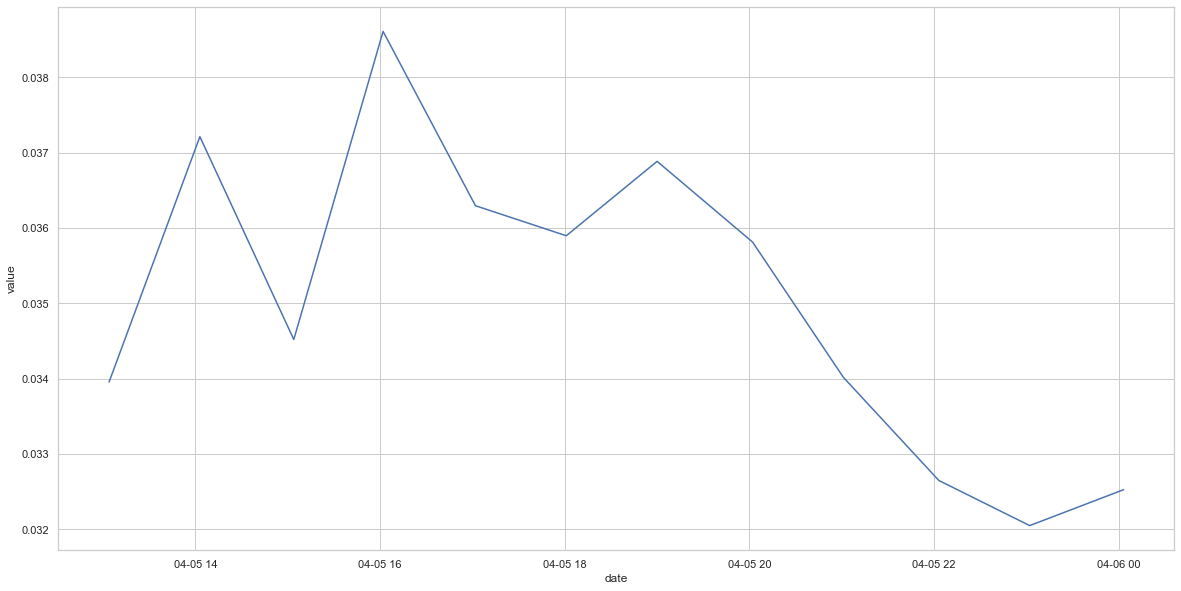

In [62]:
sns.lineplot(data = df_border_values, x = 'date', y = 'value')

In [64]:
df_border_values.value.median()

0.035165478331236705